In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sci
import scipy.linalg as la

In [2]:
# Função delta

def d(n,m):
  if n == m:
    return 1
  else:
    return 0

# *Dados*

M é o número de partículas no qudit A:
$$M = 11$$
P é o número de partículas no qudit B:
$$P = 4$$
Com isso o número total de partículas N = M+P
$$N = 15$$
Dimensão do espaço
$$dim = \frac{(N+3)(N+2)(N+1)}{6}$$


In [3]:
# Dados

M = 0
P = 5
N = M + P

dim = int((N+3)*(N+2)*(N+1)/6)

# *Protocolo 2*

## Hamiltoniano 

$$ \mathcal{H}(\mu, \nu) = H + \mu (N_3 - N_1) + \nu(N_2 - N_1) $$

Sabendo que:

$$ H = U(N_1 + N_3 - N_4 - N_2)^2 - \frac{J}{2}[(a_1^{\dagger}+a_3^{\dagger})(a_2+a_4)+(a_2^{\dagger}+a_4^{\dagger})(a_1+a_3)]$$

In [4]:
# Hamiltoniano 

U = -2.0
J = 1
mu = 0
nu = 0

Hint = np.zeros((dim,dim))
Htun = np.zeros((dim,dim))
Hq1 = np.zeros((dim,dim))
Hq2 = np.zeros((dim,dim))

l, c = 0, 0

for n1 in range(N+1):
    for n2 in range(N+1 - n1):
        for n3 in range(N+1 -n1 - n2):
            n4 = N - n1 - n2 - n3
            l = 0
            for m1 in range(N+1):
                for m2 in range(N+1 - m1):
                    for m3 in range(N+1 - m1 - m2):
                        m4 = N - m1 - m2 - m3

                        Hint[l,c] = ((n1+n3-n2-n4)**2)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)

                        Htun[l,c] = (np.sqrt((n1+1)*n2)*d(n1+1,m1)*d(n2-1,m2)*d(n3,m3)*d(n4,m4) 
                                     +np.sqrt((n1+1)*n4)*d(n1+1,m1)*d(n2,m2)*d(n3,m3)*d(n4-1,m4) 
                                     +np.sqrt((n3+1)*n2)*d(n1,m1)*d(n2-1,m2)*d(n3+1,m3)*d(n4,m4) 
                                     +np.sqrt((n3+1)*n4)*d(n1,m1)*d(n2,m2)*d(n3+1,m3)*d(n4-1,m4) 
                                     +np.sqrt(n1*(n2+1))*d(n1-1,m1)*d(n2+1,m2)*d(n3,m3)*d(n4,m4) 
                                     +np.sqrt(n1*(n4+1))*d(n1-1,m1)*d(n2,m2)*d(n3,m3)*d(n4+1,m4) 
                                     +np.sqrt((n2+1)*n3)*d(n1,m1)*d(n2+1,m2)*d(n3-1,m3)*d(n4,m4) 
                                     +np.sqrt(n3*(n4+1))*d(n1,m1)*d(n2,m2)*d(n3-1,m3)*d(n4+1,m4))

                        Hq1[l,c] = (n3 - n1)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)

                        Hq2[l,c] = (n2 - n1)*d(n1,m1)*d(n2,m2)*d(n3,m3)*d(n4,m4)

                        l +=1 
            c += 1

H = -U*Hint-0.5*J*Htun + mu*Hq1 + nu*Hq2

In [34]:
# Autovetores e autovalores
lambdan, psi = la.eigh(H)

In [35]:
# Ground State

index = 0
for i in range(len(lambdan)):
    if lambdan[i] == min(lambdan):
        break
    else:
        index += 1
    
GS = np.conj(psi[:,index].reshape((1,dim)))

In [121]:
P = []
States = []

for i in range(dim):
    P.append((abs(GS[0,i]))**2)
    States.append(i)

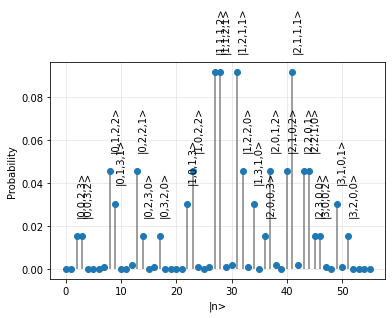

In [122]:
l = 0
(markerline, stemlines, baseline) = plt.stem(States, P, linefmt = "Gray")
plt.setp(baseline, visible=False)
plt.xlabel("|n>")
plt.grid(alpha=0.3)
plt.ylabel("Probability")
for n1 in range(N+1):
    for n2 in range(N+1-n1):
        for n3 in range(N+1 - n1 - n2):
            n4 = N - n1 - n2 - n3
            if (P[l] >= 0.01):
                plt.text(l, P[l]+0.01, f"|{n1},{n2},{n3},{n4}>", rotation = "vertical")
            l += 1
plt.show()

## Evolução temporal

A evolução temporal do sistema vai ser dado pelo operador:

$$\mathcal{U}(t,\mu,\nu) = e^{-itH(\mu,\nu)}$$

In [38]:
# Evolução temporual

def Uv(t,mu,nu):
    return la.expm(-1j*t*H)

## Ground State

Para um valor $N\approx 10$, o ground state para U<0 no regime ressonante se aproxima de:

\begin{align*}
    \ket{GS'} & = \frac{1}{\sqrt{2N!}}\left [\left(\frac{a_1^{\dagger} + a_3^{\dagger}}{\sqrt{2}}\right)^N + \left(\frac{a_2^{\dagger} + a_4^{\dagger}}{\sqrt{2}}\right)^N \right]\ket{vac} \\
    & = \frac{1}{\sqrt{2}}\sum_{k=0}^N\sqrt{\frac{C_k^N}{2^N}}(\ket{k,0,N-k,0}+\ket{0,k,0,N-k}) \\
    & = \frac{1}{\sqrt{2^{N+1}}}\sum_{k=0}^N\sqrt{C_k^N}(\ket{k,0,N-k,0}+\ket{0,k,0,N-k})
\end{align*}

In [39]:
# Ground State

aux1 = 0 
aux2 = 0
GSL = np.zeros((dim,1))
count = np.zeros((dim,1))

for k in range(N+1):
    l = 0
    cte = np.sqrt((sci.comb(N,k))/(2**(N+1)))
    G1 = np.zeros((dim,1))
    G2 = np.zeros((dim,1))
    for n1 in range(N+1):
        for n2 in range(N+1-n1):
            for n3 in range(N+1 - n1 - n2):
                n4 = N - n1 - n2 - n3
                if (n1==k and n2==0 and n3==(N-k) and n4==0):   #k0(N-k)0
                    aux1 = l
                elif (n1==0 and n2==k and n3==0 and n4==(N-k)):   #0k0(N-k)
                    aux2 = l
                l += 1
    G1[aux1,0] = 1.0
    G2[aux2,0] = 1.0
    count = cte*(G1+G2)
    GSL = GSL + count

In [126]:
P = []
States = []

for i in range(dim):
    P.append((abs(GSL[i,0]))**2)
    States.append(i)

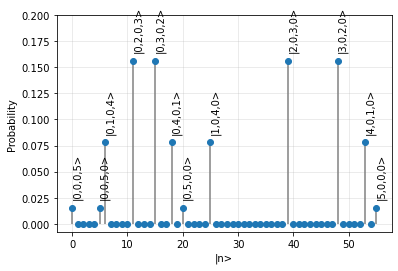

In [128]:
l = 0
(markerline, stemlines, baseline) = plt.stem(States, P, linefmt = "Gray")
plt.setp(baseline, visible=False)
plt.xlabel("|n>")
plt.grid(alpha=0.3)
plt.ylabel("Probability")
for n1 in range(N+1):
    for n2 in range(N+1-n1):
        for n3 in range(N+1 - n1 - n2):
            n4 = N - n1 - n2 - n3
            if (P[l] >= 0.01):
                plt.text(l, P[l]+0.01, f"|{n1},{n2},{n3},{n4}>", rotation = "vertical")
            l += 1
plt.ylim(top = 0.20)
plt.show()

In [90]:
F.append((abs(GS.dot(GSL))[0,0])**2)
UJ.append(abs(U/J))

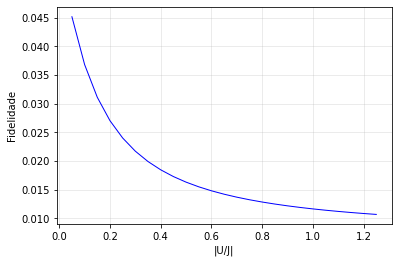

In [257]:
plt.plot(UJ, F, 'b-', lw = 1)
plt.grid(alpha=0.3)
plt.xlabel("|U/J|")
plt.ylabel(r'Fidelidade')
plt.show()

## *$\ket{\psi(\theta,\phi)}$*

A quebra de inegrabilidade será dado por 

$$\ket{\psi(\theta,\phi)} = \mathcal{U}(\tau,0,0)\mathcal{U}(t,\mu,\nu)\ket{GS} $$

O valor teórico esperado é dado por,

$$\ket{\psi(\theta,\phi)} = \frac{1}{\sqrt{2}}\left [(c_{\theta}a_1^{\dagger} - s_{\theta}sgn(\mu)a_3^{\dagger})^N + (c_{\phi}a_2^{\dagger} - s_{\phi}sgn(\nu)a_4^{\dagger})^N \right ]\ket{vac} $$

onde:

\begin{align*}
    c_x & = cos\left (\frac{x}{2} - sgn(\gamma _x)\frac{\pi}{4} \right), \quad\quad x = \theta, \phi \\
    s_x & = sin\left (\frac{x}{2} - sgn(\gamma _x)\frac{\pi}{4} \right), \quad\quad \gamma _{\theta} = \mu, \gamma_{\phi} = \nu
\end{align*}

Fazendo a expansão binomial $(a+b)^N = \sum_{k=0}^N C_k^N a^{N-k}b^k$, obtemos que:

$$\ket{\psi(\theta,\phi)} = \frac{1}{\sqrt{2}}\sum_{k=0}^N\sqrt{\frac{C_k^N}{N!}}[(c_{\theta})^{N-k}(-s_{\theta}sgn(\mu))^k\ket{N-k,0,k,0} +(c_{\phi})^{N-k}(-s_{\phi}sgn(\nu))^k\ket{0,N-k,0,k} ]$$

In [142]:
# Psi Analítico

w = J**2/(4*(np.abs(U))*(N-1))
tal = np.pi/(2*w)

t = np.pi/(4*mu)    # pi/2
G = GS.reshape((dim,1))
psiA = Uv(tal,0,0).dot(Uv(t,mu,nu)).dot(G)

In [143]:
# Psi teórico

def psiT(theta, phi):
    ct = np.cos((theta/2)-np.sign(mu)*(np.pi/4))
    cp = np.cos((phi/2)-np.sign(nu)*(np.pi/4))
    st = np.sin((theta/2)-np.sign(mu)*(np.pi/4))
    sp = np.sin((phi/2)-np.sign(nu)*(np.pi/4))
    GS = np.zeros((dim,1))
    for k in range(N+1):
        l = 0
        cte = np.sqrt((sci.comb(N,k))/(np.math.factorial(N)*2))
        G1 = np.zeros((dim,1))
        G2 = np.zeros((dim,1))
        for n1 in range(N+1):
            for n2 in range(N+1-n1):
                for n3 in range(N+1 - n1 - n2):
                    n4 = N - n1 - n2 - n3
                    if (n1==N-k and n2==0 and n3==k and n4==0):   #(N-k)0k0
                        aux1 = l
                    if (n1==0 and n2==N-k and n3==0 and n4==k):   #0(N-k)0k
                        aux2 = l
                    l += 1
        G1[aux1,0] = 1.0
        G2[aux2,0] = 1.0
        GS = GS + cte*((ct**(N-k)*(-st*np.sign(mu)**k))*G1 + (cp**(N-k)*(-sp*np.sign(nu)**k))*G2)
    return GS

In [145]:
psi = np.conjugate(psiT(np.pi/2,np.pi/2)).reshape((1,dim))

print(psi)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [146]:
# Matrizes

N1, N2, N3, N4 = (np.zeros((dim,dim)),
                  np.zeros((dim,dim)),
                  np.zeros((dim,dim)),
                  np.zeros((dim,dim)))

c = 0
for n1 in range(0,N+1):
  for n2 in range(0,N+1-n1):
    for n3 in range(0,N+1-n1-n2):
      n4 = N - n1 - n2 - n3
      l = 0
      for m1 in range(0,N+1):
        for m2 in range(0,N+1-m1):
          for m3 in range(0,N+1-m1-m2):
            m4 = N - m1 - m2 - m3
                
            N1[l,c] = n1*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N2[l,c] = n2*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N3[l,c] = n3*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            N4[l,c] = n4*d(m1,n1)*d(m2,n2)*d(m3,n3)*d(m4,n4)
            l += 1
      c += 1